In [ ]:
Линейная модель

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing


# Считываем файл 
data = pd.read_csv('forestfires.csv', header=0)
# Создаем Y
y = data.loc[:, ["area"]]
# Создаем и преобразовываем X
x = data.loc[:, (data.dtypes == np.float64) | (data.dtypes == np.int64)]
# Удаляем ненужные столбцы
x = data.iloc[:,:-1]
x = data.iloc[:, -9:]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [5]:
import math
all_rows = 517

train_data = int(math.floor(all_rows * 0.8))
test_data = int(math.floor(all_rows * 0.2))
target_data = int(math.floor(all_rows * 0))

x_train = x[:train_data]
x_test = x[train_data:(train_data + test_data)]

y_train = y.iloc[:train_data]
y_test = y.iloc[train_data:(train_data + test_data)]

x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)
#_Y_train = preprocessing.scale(_Y_train)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
y_pred = regr.predict(x_test)
y_pred

array([[ -2.67605271e+00],
       [ -2.67605271e+00],
       [  5.43740304e+02],
       [  2.46389855e+00],
       [ -2.67605271e+00],
       [ -8.89516943e-01],
       [ -4.42883002e-01],
       [  1.33334965e+02],
       [ -2.67605271e+00],
       [  1.93672406e+00],
       [ -2.14887822e+00],
       [  9.55593764e-01],
       [ -2.67605271e+00],
       [ -2.67605271e+00],
       [ -9.55413754e-01],
       [ -2.67605271e+00],
       [ -3.33054984e-01],
       [ -2.67605271e+00],
       [  1.98065527e+00],
       [ -2.67605271e+00],
       [  8.55569263e+00],
       [ -2.67605271e+00],
       [ -2.67605271e+00],
       [ -2.28067184e+00],
       [ -2.67605271e+00],
       [  2.03190834e+00],
       [ -2.43443107e+00],
       [ -2.67605271e+00],
       [ -1.77546296e+00],
       [ -2.23226966e-01],
       [ -2.67605271e+00],
       [  4.61652771e+00],
       [ -2.67605271e+00],
       [ -2.67605271e+00],
       [ -2.67605271e+00],
       [ -2.67605271e+00],
       [ -2.67605271e+00],
 

In [7]:
y_test

,area
413,0.00
414,0.00
415,746.28
416,7.02
417,0.00
418,2.44
419,3.05
420,185.76
421,0.00
422,6.30


In [9]:
# Коэффициенты
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[ -7.76798054e-15,  -1.44343078e-14,   6.72154286e-15,
          1.94502150e-14,  -1.22228909e-14,  -1.81276224e-14,
         -3.46387960e-14,  -1.01639293e-14,   5.87084937e+01]]))


In [10]:
# The mean squared error
print("Mean squared error: %.100f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 521.8765256085056307711056433618068695068359375000000000000000000000000000000000000000000000000000000000


In [11]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.92


In [ ]:
Полиномиальная модель

In [12]:
y_train

,area
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00
7,0.00
8,0.00
9,0.00


Mean squared error: 521.8765256085054033974302001297473907470703125000000000000000000000000000000000000000000000000000000000
Variance score: 0.92
Mean squared error: 556.1472894268307527454453520476818084716796875000000000000000000000000000000000000000000000000000000000
Variance score: 0.91
Mean squared error: 509.9188924110014795587630942463874816894531250000000000000000000000000000000000000000000000000000000000
Variance score: 0.92
Mean squared error: 5231.4642031146740919211879372596740722656250000000000000000000000000000000000000000000000000000000000000
Variance score: 0.19
Mean squared error: 61053.2951464665020466782152652740478515625000000000000000000000000000000000000000000000000000000000000000
Variance score: -8.50


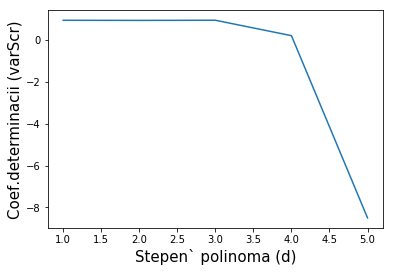

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

d = [1, 2, 3, 4, 5]
varScr = []
for i in  d:
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", regr)])

    pipeline.fit(np.array(x_train), np.array(y_train))

    y_pred = pipeline.predict(np.array(x_test))

    # The mean squared error
    print("Mean squared error: %.100f"
          % mean_squared_error(y_test, y_pred))
    varScr.append(r2_score(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    i = i + 1
    
    
fig = plt.figure()
plt.plot(d,varScr)
plt.xlabel('Stepen` polinoma (d)', fontsize=15)
plt.ylabel('Coef.determinacii (varScr)', fontsize=15)
plt.show()

In [ ]:
Регуляризация

In [69]:
regr = linear_model.Lasso(alpha=1)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print("Mean squared error: %.100f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 565.8243375216071626709890551865100860595703125000000000000000000000000000000000000000000000000000000000
Variance score: 0.91
